In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy
import pandas as pd

Using TensorFlow backend.


In [39]:
url = "/home/younseun/python_source/columbus_study/04_learning_tensorflow/11__Keras/data/pima-indians-diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

dataframe = pd.read_csv(url, names=names)
array = dataframe.values

X = array[9:,0:8]
Y = array[9:,8]

print('>>> 1 ~ 9행은 칼럼 설명이 있다. \n{}'.format(array[:12]))

>>> 1 ~ 9행은 칼럼 설명이 있다. 
[['# 1. Number of times pregnant' nan nan nan nan nan nan nan nan]
 ['# 2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test'
  nan nan nan nan nan nan nan nan]
 ['# 3. Diastolic blood pressure (mm Hg)' nan nan nan nan nan nan nan nan]
 ['# 4. Triceps skin fold thickness (mm)' nan nan nan nan nan nan nan nan]
 ['# 5. 2-Hour serum insulin (mu U/ml)' nan nan nan nan nan nan nan nan]
 ['# 6. Body mass index (weight in kg/(height in m)^2)' nan nan nan nan
  nan nan nan nan]
 ['# 7. Diabetes pedigree function' nan nan nan nan nan nan nan nan]
 ['# 8. Age (years)' nan nan nan nan nan nan nan nan]
 ['# 9. Class variable (0 or 1)' nan nan nan nan nan nan nan nan]
 ['6' 148.0 72.0 35.0 0.0 33.6 0.627 50.0 1.0]
 ['1' 85.0 66.0 29.0 0.0 26.6 0.35100000000000003 31.0 0.0]
 ['8' 183.0 64.0 0.0 0.0 23.3 0.672 32.0 1.0]]


In [20]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [45]:
#모델을 JSON 파일 형식으로 만들어 저장하기
model_json = model.to_json()
with open("keras_20180929_example02_model_architecture.json", "w") as json_file : 
    json_file.write(model_json)

In [47]:
#모델을 YAML 파일 형식으로 만들어 저장하기
model_yaml = model.to_yaml()
with open("keras_20180929_example02_model_architecture.yaml", "w") as yaml_file : 
    yaml_file.write(model_yaml)

In [44]:
# Weight를 h5 파일 포맷으로 만들어 저장하기
model.save_weights("keras_20180929_example02_model_weight.h5")
print("Saved model to disk")

Saved model to disk


In [49]:
# 저장된 JSON 파일로 부터 모델 로드하기
from keras.models import model_from_json
json_file = open("keras_20180929_example02_model_architecture.json", "r")
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

In [50]:
# 저장된 JSON 파일로 부터 모델 로드하기
from keras.models import model_from_yaml
yaml_file = open("keras_20180929_example02_model_architecture.yaml", "r")
loaded_model_yaml = yaml_file.read()
yaml_file.close()
loaded_model = model_from_yaml(loaded_model_yaml)

In [51]:
#로드한 모델에 Weight 로드하기
loaded_model.load_weights("keras_20180929_example02_model_weight.h5")
print("Loaded model from disk")

Loaded model from disk


In [52]:
#  모델 컴파일 후 Evaluation

loaded_model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=['accuracy'])

# model evaluation
score = loaded_model.evaluate(X,Y,verbose=0)

print("%s : %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

acc : 51.82%


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


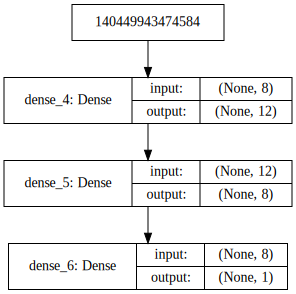

In [55]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

loaded_model.summary()
SVG(model_to_dot(loaded_model, show_shapes=True).create(prog='dot', format='svg'))

# 에러가 날경우 sudo apt-get install graphviz 를 실행한다.